In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools as it

In [49]:
data = {
    'outer_wall': {
        'ref_tapping': 0.110,
        'airbox_tapping': 0.196,
        'atm': 0.102,
        'values': [
            0.110,
            0.114,
            0.124,
            0.144,
            0.142,
            0.144,
            0.130,
            0.106,
            0.102,
            0.104,
        ],
    },
    'inner_wall': {
        'ref_tapping': 0.112,
        'airbox_tapping': 0.198,
        'atm': 0.104,
        'values': [
            0.112,
            0.105,
            0.072,
            0.024,
            0.010,
            0.022,
            0.068,
            0.094,
            0.102,
            0.104,
        ],
    },
    'radial_section': {
        'ref_tapping': 0.110,
        'airbox_tapping': 0.196,
        'atm': 0.102,
        'values': [
            0.050,
            0.075,
            0.084,
            0.104,
            0.112,
            0.122,
            0.130,
            0.138,
            0.144,
        ],
    },
}

for section in data.keys():
    num_vals = 10 if not section == 'radial_section' else 9
    assert len(data[section]['values']) == num_vals, f'There are not {num_vals} values'

constants = {
    'rho_air': 1.2,
}

angles = [0, 0, 0, 22.5, 22.5, 22.5, 22.5, 0, 0, 0]
bend_dims = {
    'outer_wall': np.cumsum([angle * np.pi * 0.1 / 180 if angle else 0.025 for angle in angles]) - 0.025,
    'inner_wall': np.cumsum([angle * np.pi * 0.05 / 180 if angle else 0.025 for angle in angles]) - 0.025
}

In [50]:
def c_p_wall(l, section):
    return (l - data[section]['ref_tapping']) / (data[section]['airbox_tapping'] - data[section]['ref_tapping'])

def u_ratio(r, r_1=0.05, r_2=0.1):
    return (r_2 - r_1) / (r * np.log(r_2/r_1))

def c_p_free_vortex(r):
    return 1 - u_ratio(r)**2

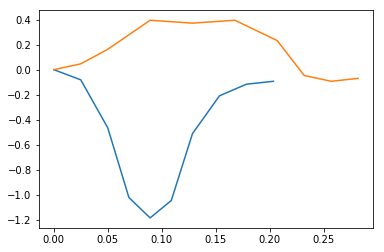

In [51]:
results = {
    'c_p': {}
}
for key in data.keys():
    results['c_p'][key] = [c_p_wall(l, section=key) for l in data[key]['values']]

plt.plot(bend_dims['inner_wall'], results['c_p']['inner_wall'])
plt.plot(bend_dims['outer_wall'], results['c_p']['outer_wall'])
plt.show()

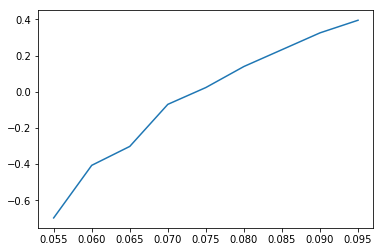

In [52]:
plt.plot(np.linspace(0.055, 0.095, len(results['c_p']['radial_section'])), results['c_p']['radial_section'])
plt.show()

In [53]:
results['c_p']['free_vortex'] = [c_p_free_vortex(r) for r in np.linspace(0.055, 0.095, 9)]  

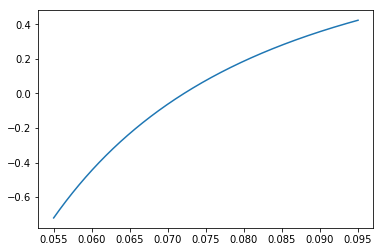

In [54]:
num_data_points = 1000
plt.plot(np.linspace(0.055, 0.095, num_data_points), [c_p_free_vortex(r) for r in np.linspace(0.055, 0.095, num_data_points)])
plt.show()

In [117]:
bi_angles = np.array([0, 0, 11.25, 34.75, 57.25, 79.75, 90, 90, 90]) * np.pi / 180
b = 0.1
dynamic_pressure = {}
dynamic_pressure['inner'] = 1/2 * 1000 * 9.81 * np.cos(30 * np.pi / 180) * (data['inner_wall']['airbox_tapping'] - data['inner_wall']['ref_tapping'])
dynamic_pressure['outer'] = 1/2 * 1000 * 9.81 * np.cos(30 * np.pi / 180) * (data['outer_wall']['airbox_tapping'] - data['outer_wall']['ref_tapping'])
c_p_outer_wall = results['c_p']['outer_wall']
c_p_inner_wall = results['c_p']['inner_wall']

In [118]:
c_p_vect_outer = 1/2 * np.array([c_p_outer_wall[i+1] + c_p_outer_wall[i] for i in range(len(c_p_outer_wall)-1)])
c_p_vect_inner = 1/2 * np.array([c_p_inner_wall[i+1] + c_p_inner_wall[i] for i in range(len(c_p_inner_wall)-1)])

In [119]:
x_dir_outer = np.cos(bi_angles) * b * np.array(bend_dims['outer_wall'][1:])
x_dir_inner = np.cos(bi_angles) * b * np.array(bend_dims['inner_wall'][1:])

In [120]:
y_dir_outer = np.sin(bi_angles) * b * np.array(bend_dims['outer_wall'][1:])
y_dir_inner = np.sin(bi_angles) * b * np.array(bend_dims['inner_wall'][1:])

In [121]:
F_x = (dynamic_pressure['outer'] * np.dot(c_p_vect_outer.T, x_dir_outer)) + (dynamic_pressure['inner'] * np.dot(c_p_vect_inner.T, x_dir_inner))
F_y = (dynamic_pressure['outer'] * np.dot(c_p_vect_outer.T, y_dir_outer)) + (dynamic_pressure['inner'] * np.dot(c_p_vect_inner.T, y_dir_inner))

In [122]:
F = np.sqrt(F_x**2 + F_y**2)
_dir = np.arctan(F_y/F_x) * 180 / np.pi

In [123]:
print(F, _dir)

9.72343588391 64.8927786973


In [137]:
outer_wall_vals = results['c_p']['outer_wall']
inner_wall_vals = results['c_p']['inner_wall']

average_c_p = {}
average_c_p['in'] = 1/2 * (outer_wall_vals[0] + outer_wall_vals[0])
average_c_p['out'] = 1/2 * (outer_wall_vals[len(outer_wall_vals)-1] + inner_wall_vals[len(inner_wall_vals)-1])

bend_loss_coeff = average_c_p['out'] - average_c_p['in']

In [139]:
print(bend_loss_coeff)

-0.08139534883720936
